# Programmieraufgaben zu 3.4 (Anomalieerkennung)

Sei ein Datensatz gegeben durch

$$
E=\{(11,0.8),(11.6,1),(9.2,0.9),(14.1,0.8),(13.4,0.9),(8.8,1.1),(12.2,0.8)\}
$$

1. Nutzen Sie die Funktion `covariance.EllipticEnvelope` aus scikit-learn, um zu bestimmen, ob der Punkt $x_8=(13.9,1.1)$ ein Ausreißer ist.
2. Visualisieren Sie den Datensatz $E$ inklusive des Punktes $x_8$ und der Entscheidungsgrenze, die in der vorherigen Aufgabe bestimmt wurde.


In [27]:
from sklearn.covariance import EllipticEnvelope

E=[(11,0.8),(11.6,1),(9.2,0.9),(14.1,0.8),(13.4,0.9),(8.8,1.1),(12.2,0.8)]
x_8 = (13.9,1.1)

model = EllipticEnvelope().fit(E)

print(f"x_8 ist abnormal: {model.predict([x_8])[0] == -1}")

x_8 ist abnormal: True


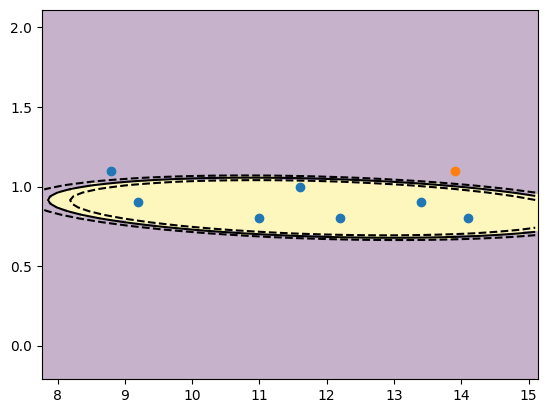

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(model, data: list, additional_points: list):
    _, ax = plt.subplots()
    common_params = {"estimator": model, "X": np.array(data), "ax": ax}
    DecisionBoundaryDisplay.from_estimator(**common_params, response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,)

    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    plt.scatter(*zip(*data))
    plt.scatter(*additional_points)

    plt.show()

plot_decision_boundary(model, E, x_8)